## Python Basic

In [1]:
a = 3 
b = 2
a + b

5

## Requests GET

In [2]:
import requests
res = requests.get('https://tw.appledaily.com/new/realtime')
res

<Response [200]>

In [6]:
#res.text

In [5]:
import requests
res = requests.get('http://www.twse.com.tw/fund/BFI82U?response=json&dayDate=&weekDate=&monthDate=&type=day&_=1548297374422')
#res.text

## Pytesseract

In [7]:
! pip install pytesseract

  Running setup.py bdist_wheel for pytesseract: started
  Running setup.py bdist_wheel for pytesseract: finished with status 'done'
  Stored in directory: C:\Users\stu\AppData\Local\pip\Cache\wheels\d5\90\56\ab7b652592da86821293f7cadc1c554aa376a0d57ce414d0a0
Successfully built pytesseract


distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 19.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [8]:
import requests
res = requests.get('https://serv.gcis.nat.gov.tw/pub/kaptcha.jpg')
with open('kaptcha.jpg', 'wb') as f:
    f.write(res.content)

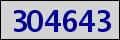

In [9]:
from PIL import Image
Image.open('kaptcha.jpg')

In [11]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\\Program Files (x86)\\Tesseract-OCR\\tesseract.exe'

print(pytesseract.image_to_string(Image.open('kaptcha.jpg')))

304643


## 買賣日報

In [23]:
import requests
from bs4 import BeautifulSoup
rs = requests.session()
res = rs.get('http://bsr.twse.com.tw/bshtm/bsMenu.aspx')
soup = BeautifulSoup(res.text, 'lxml')
payload = dict([(e.get('name'), e.get('value')) for e in soup.select('input[type=hidden]')])

In [24]:
payload.update({
'RadioButton_Normal': 'RadioButton_Normal',
'TextBox_Stkno': '2454',
#'CaptchaControl1': 'GQZLE',
'btnOK': '查詢'       
})

res = rs.post('http://bsr.twse.com.tw/bshtm/bsMenu.aspx', data = payload)

In [26]:
res = rs.get('http://bsr.twse.com.tw/bshtm/bsContent.aspx')
#print(res.text)

## Requests POST

In [28]:
import requests
url = 'https://www.thsrc.com.tw/tw/TimeTable/Search'

payload = {
'StartStationName':  '台北站',
'EndStationName':    '新竹站',
'SearchType': 'S',
'StartStation': '977abb69-413a-4ccf-a109-0272c24fd490',
'EndStation': 'a7a04c89-900b-4798-95a3-c01c455622f4',
'DepartueSearchDate': '2019/01/24',
'DepartueSearchTime': '18:00'
}

res = requests.post(url, data = payload)
#res.text

## BeautifulSoup
- https://www.crummy.com/software/BeautifulSoup/bs4/doc/index.zh.html

In [30]:
import requests
res = requests.get('https://tw.appledaily.com/new/realtime')
#res.text

In [32]:
type(res)

requests.models.Response

In [31]:
from bs4 import BeautifulSoup

html_sample= '''
<html>
  <body>
    <h1 id="title">Hello World</h1>
    <a href="#" class="link">This is link1</a>
    <a href="# link2" class="link">This is link2</a>
  </body>
</html>'''

soup= BeautifulSoup(html_sample,'lxml')
soup.text

'\n\nHello World\nThis is link1\nThis is link2\n\n'

In [33]:
type(soup)

bs4.BeautifulSoup

In [34]:
soup.select_one('h1')

<h1 id="title">Hello World</h1>

In [35]:
soup.select_one('h1').text

'Hello World'

In [36]:
soup.select_one('a')

<a class="link" href="#">This is link1</a>

In [39]:
for link in soup.select('a'):
    print(link.text)
    print(link.get('href'))

This is link1
#
This is link2
# link2


In [40]:
# id => #
soup.select_one('#title')

<h1 id="title">Hello World</h1>

In [41]:
soup.select_one('h1#title')

<h1 id="title">Hello World</h1>

In [42]:
soup.select_one('body h1#title')

<h1 id="title">Hello World</h1>

In [43]:
soup.select_one('body h1')

<h1 id="title">Hello World</h1>

In [44]:
soup.select_one('body #title')

<h1 id="title">Hello World</h1>

In [45]:
# class => .
soup.select('.link')

[<a class="link" href="#">This is link1</a>,
 <a class="link" href="# link2">This is link2</a>]

In [46]:
soup.select('a.link')

[<a class="link" href="#">This is link1</a>,
 <a class="link" href="# link2">This is link2</a>]

In [47]:
soup.select('body a.link')

[<a class="link" href="#">This is link1</a>,
 <a class="link" href="# link2">This is link2</a>]